In [1]:
import numpy as np              #funções matemáticas
import statistics as sta        #funções estatísticas
import pandas as pd             #acesso e manipulação de dados
import string as stg            #manipulação de strings
import matplotlib.pyplot as plt  #funções básicas para gráficos

### Modelo IS
Este modelo é somente a curva IS, sendo a taxa de juros, por ora, uma variável exógena.

Curva IS
\begin{align}

Y(t) = C(t) + I(t) + G(t) \\

C(t) = C0 + c[Y(t-1)-T(t)] \\

I(t) = I0 \\

G(t) = T \\

D(t) = D(t=1)+T(t)-G(t) \\

\end{align} 
### Curva LM

M = kY(t) - hi(t)


Y(t), C(t), i(t) e D(t) são variáveis endógenas,

G, T, Mo são variáveis exógenas

Co e c, I0, d, F, D0 sao parâmetros das equações ou comportamentais

Este modelo em equilíbrio Yeq, quando Y(t-1)=Y(t)=(t-1)=...=Y

Y = C + I + G

C = C0 + c(Y - T)

Y = C0 + c(y-T) + I0 + G

(1-c)Y = C0 - cT _ I0 + G

Yeq = 1 / (1-c) * (C0 - cT + I0 + G)

mult_simples = 1 / (1-c)

### 1) Declaração de Variáveis exógenas e Parâmetros

In [2]:
C0 = 100    #consumo autonomo
c  = 0.8    #propenão marginal a consumir
I0 = 300    #investimento - fixo ou constante
G  = 200    #gasto do governo - fixo ou constante
T  = 200    #tributos - fixo ou constante
Y  = []     #lista para armazenar os valores de Y(t)
C  = []     #lista para armazenar os valores C(t)
D  = []     #lista para armazenar dívida do governo
time = 20 

### 2) Equações Dinâmicas

In [3]:
def eqC(val):               #equação consumo
    _c = C0 + c*(val-T)     #val = Renda = Y(t-1)
    C.append(_c)

def eqY():                  #equação Renda
    _y = C[t] + I0 + G
    Y.append(_y)

def eqD(val):                  #equação da dívida
    _d = val + T - G
    D.append(_d)


### 3) Dinâmica: calculos iterados no tempo após um aumento permanente dos gastos do governo G = 220

In [4]:
#Inicia vetores em t=0, com valores iniciais(condições iniciais)
y_eq = (1 / (1 - c)) * (C0 + I0 + G - c * T)
Y.append(y_eq)
c_eq = C0 + c * (y_eq - T)
C.append(c_eq)
D.append(T-G)
G = 220         #choque de política fiscal

In [5]:
#loop temporal (crial série temporada para cada variavel endógena)
for t in range(1, time):
    eqC(Y[t-1])
    eqY()
    eqD(D[t-1])

print(Y)
print(C)
print(D)

[2200.0000000000005, 2220.0000000000005, 2236.0000000000005, 2248.8, 2259.04, 2267.232, 2273.7856, 2279.02848, 2283.222784, 2286.5782272, 2289.26258176, 2291.4100654080003, 2293.1280523264004, 2294.50244186112, 2295.6019534888965, 2296.4815627911175, 2297.185250232894, 2297.7482001863154, 2298.1985601490524, 2298.5588481192417]
[1700.0000000000005, 1700.0000000000005, 1716.0000000000005, 1728.8000000000004, 1739.0400000000002, 1747.232, 1753.7856000000002, 1759.0284800000002, 1763.222784, 1766.5782272000001, 1769.26258176, 1771.4100654080003, 1773.1280523264004, 1774.5024418611204, 1775.6019534888962, 1776.4815627911173, 1777.185250232894, 1777.7482001863152, 1778.1985601490524, 1778.558848119242]
[0, -20, -40, -60, -80, -100, -120, -140, -160, -180, -200, -220, -240, -260, -280, -300, -320, -340, -360, -380]


In [6]:
#juntar todas as listas e transformar em um dataframe
colunas = list(zip(Y, C, D))                        #juntando
df = pd.DataFrame(colunas, columns=['Y','C','D'])   #conversão para dataframe
df.to_csv('ModeloISLM-Resultado.csv')               #exportando o arquivo para o formato .csv


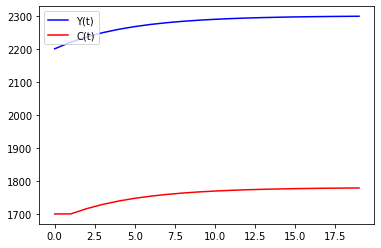

In [7]:
#plotando as informações até aqui
t = list(range(0, time))
plt.plot(t, Y, label="Y(t)", color = 'blue')
plt.plot(t, C, label='C(t)', color='red')
plt.legend(loc='upper left')
plt.show()